In [1]:
import pandas as pd
from sklearn.decomposition import NMF
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
# PyTorch related imports would go here

# Original Data

In [2]:
df = pd.read_csv('PM25-Speciated/Speciate_Raw_V07052024.csv')

In [3]:
df

,code,name,mass,cat1,cat2,cat3,species,weight%
0,10,Overall Composite,55.476002,Miscellaneous,Miscellaneous,Miscellaneous,Ammonium,0.023000
1,10,Overall Composite,55.476002,Miscellaneous,Miscellaneous,Miscellaneous,Potassium,1.843000
2,10,Overall Composite,55.476002,Miscellaneous,Miscellaneous,Miscellaneous,Selenium,0.025000
3,10,Overall Composite,55.476002,Miscellaneous,Miscellaneous,Miscellaneous,Silicon,7.736000
4,10,Overall Composite,55.476002,Miscellaneous,Miscellaneous,Miscellaneous,Sodium,1.377000
...,...,...,...,...,...,...,...,...
80895,SUGP02,Sugar Cane Pre-Harvest Burning Mexico,100.000000,Combustion,Biomass Burning; Agriculture,Pre-harvest Sugar Cane,Potassium,17.899160
80896,SUGP02,Sugar Cane Pre-Harvest Burning Mexico,100.000000,Combustion,Biomass Burning; Agriculture,Pre-harvest Sugar Cane,Sodium,0.168067
80897,SUGP02,Sugar Cane Pre-Harvest Burning Mexico,100.000000,Combustion,Biomass Burning; Agriculture,Pre-harvest Sugar Cane,Sulfate,3.361345
80898,SUGP02,Sugar Cane Pre-Harvest Burning Mexico,100.000000,Combustion,Biomass Burning; Agriculture,Pre-harvest Sugar Cane,Ammonium,2.184874


In [4]:
pivot_df = df.pivot_table(index=['code', 'name'], columns='species', values='weight%', aggfunc='first').reset_index()
# Fill NaN values with 0 (or any other value you prefer)
pivot_df = pivot_df.fillna(0)

In [5]:
pivot_df

species,code,name,Aluminum,Ammonium,Antimony,Arsenic,Bromine,Cadmium,Calcium,Calcium ion,...,Silica,Silicon,Sodium,Sodium ion,Sulfate,Sulfur,Tin,Vanadium,Zinc,Zirconium
0,00000C,Overall Composite,4.079000,0.030000,0.806000,1.118000,0.0,0.285000,2.804000,0.0,...,0.0,8.933000,1.577000,0.00000,5.030000,2.457000,0.103000,0.059000,2.235000,0.004000
1,10,Overall Composite,3.819000,0.023000,0.809000,1.410000,0.0,0.385000,2.399000,0.0,...,0.0,7.736000,1.377000,0.00000,5.046000,2.632000,0.114000,0.058000,2.218000,0.002000
2,100CROC,Onroad Gasoline Cold Start,0.000000,0.430694,0.000000,0.000000,0.0,0.000000,0.387691,0.0,...,0.0,0.000000,0.005178,0.00000,0.945113,0.000000,0.000000,0.000000,0.078439,0.000000
3,101CROC,Onroad Gasoline Running,0.323953,2.778929,0.000000,0.000000,0.0,0.000000,1.443041,0.0,...,0.0,0.323953,0.039129,0.00000,7.187084,0.000000,0.000000,0.000000,0.592782,0.000000
4,102CROC,Onroad Diesel Non-DPF Idle,0.060154,1.739422,0.000000,0.000000,0.0,0.000000,0.584029,0.0,...,0.0,0.297084,0.307717,0.00000,5.266531,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3800,95806,Peat Fire-Smoldering-Minnesota AE6,0.000376,0.107249,0.000000,0.000905,0.0,0.000000,0.000000,0.0,...,0.0,0.001436,0.000000,0.00000,0.428752,0.283134,0.000000,0.000266,0.000000,0.000063
3801,95807,Forest Fire Understory-Flaming-Minnesota AE6,0.000000,0.059422,0.034348,0.001050,0.0,0.031667,0.000000,0.0,...,0.0,0.006495,0.000000,0.00000,0.318718,0.211847,0.000000,0.005668,0.035434,0.000000
3802,95808,Forest Fire Understory-Smoldering-Minnesota AE6,0.000000,0.057489,0.004902,0.000693,0.0,0.003139,0.032457,0.0,...,0.0,0.004388,0.051420,0.07137,0.512190,0.281013,0.001126,0.000298,0.005076,0.000067
3803,95809,Grass Fire-Field-Kansas AE6,0.039424,0.159261,0.002697,0.001284,0.0,0.001939,0.790562,0.0,...,0.0,0.881017,0.031122,0.00000,0.828073,0.382831,0.004751,0.000134,0.040129,0.000624


# Clustering based on name

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from us import states
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [7]:
state_names = [state.name.lower() for state in states.STATES]
state_abbrs = [state.abbr for state in states.STATES]
city_df = pd.read_csv('PM25-Speciated/worldcities.csv')
city_names = city_df['city_ascii'].str.lower().tolist()  # First column
country_names = city_df['country'].str.lower().tolist()  # First column

In [8]:
stop_words = TfidfVectorizer(stop_words='english').get_stop_words()
stop_words = list(list(stop_words)+ city_names + country_names + state_names + state_abbrs)

In [9]:
vectorizer = TfidfVectorizer(stop_words=stop_words)
X = vectorizer.fit_transform(pivot_df['name'].str.replace('[-,%/0-9&)(]', '', regex=True).str.lower())

In [10]:
num_clusters = 256
kmeans = KMeans(n_clusters=num_clusters, random_state=0, n_init='auto')
pivot_df['cluster_kmeans'] = kmeans.fit_predict(X)

In [11]:
for cluster_num in range(num_clusters):
    print(f"\nCluster {cluster_num}:")
    cluster_texts = pivot_df[pivot_df['cluster_kmeans'] == cluster_num]['name']
    for text in cluster_texts:
        print(f" - {text}")


Cluster 0:
 - Soil Dust - Laurel Md
 - Soil Dust - Laurel Md
 - Soil Dust - Laurel Md
 - Soil Dust - Laurel Md

Cluster 1:
 - Light Duty Vehicle - With Catalyst
 - Light Duty Vehicle - With Catalyst
 - Light Duty Vehicle - With Catalyst
 - Light Duty Vehicle - With Catalyst
 - Light Duty Vehicle Exhaust - Gasoline
 - Light Duty Vehicle Exhaust - Gasoline
 - Light Duty Vehicle Exhaust - Gasoline
 - Light Duty Vehicle Exhaust - Gasoline
 - Light Duty Vehicle Exhaust - Gasoline
 - Light Duty Vehicle Exhaust - Gasoline
 - Light Duty Vehicle Exhaust - Gasoline
 - Light Duty Vehicle Exhaust - Gasoline
 - Light Duty Vehicle Exhaust - Gasoline
 - Light Duty Vehicle Exhaust - Gasoline
 - Light Duty Vehicle Exhaust - Gasoline
 - Light Duty Vehicle Exhaust - Gasoline
 - Light Duty Vehicle Exhaust - Gasoline
 - Light Duty Vehicle Exhaust - Gasoline
 - Light Duty Vehicle Exhaust - Gasoline
 - Light Duty Vehicle Exhaust - Gasoline
 - Light Duty Vehicle Exhaust - Gasoline
 - Light Duty Vehicle Exhau

In [12]:
def majority_name(cluster):
    return pivot_df[pivot_df['cluster_kmeans'] == cluster]['name'].mode()[0]

pivot_df['assigned_profile'] = pivot_df['cluster_kmeans'].apply(majority_name)

In [13]:
pivot_df

species,code,name,Aluminum,Ammonium,Antimony,Arsenic,Bromine,Cadmium,Calcium,Calcium ion,...,Sodium,Sodium ion,Sulfate,Sulfur,Tin,Vanadium,Zinc,Zirconium,cluster_kmeans,assigned_profile
0,00000C,Overall Composite,4.079000,0.030000,0.806000,1.118000,0.0,0.285000,2.804000,0.0,...,1.577000,0.00000,5.030000,2.457000,0.103000,0.059000,2.235000,0.004000,153,Overall Composite
1,10,Overall Composite,3.819000,0.023000,0.809000,1.410000,0.0,0.385000,2.399000,0.0,...,1.377000,0.00000,5.046000,2.632000,0.114000,0.058000,2.218000,0.002000,153,Overall Composite
2,100CROC,Onroad Gasoline Cold Start,0.000000,0.430694,0.000000,0.000000,0.0,0.000000,0.387691,0.0,...,0.005178,0.00000,0.945113,0.000000,0.000000,0.000000,0.078439,0.000000,54,Forest Fire
3,101CROC,Onroad Gasoline Running,0.323953,2.778929,0.000000,0.000000,0.0,0.000000,1.443041,0.0,...,0.039129,0.00000,7.187084,0.000000,0.000000,0.000000,0.592782,0.000000,54,Forest Fire
4,102CROC,Onroad Diesel Non-DPF Idle,0.060154,1.739422,0.000000,0.000000,0.0,0.000000,0.584029,0.0,...,0.307717,0.00000,5.266531,0.000000,0.000000,0.000000,0.000000,0.000000,54,Forest Fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3800,95806,Peat Fire-Smoldering-Minnesota AE6,0.000376,0.107249,0.000000,0.000905,0.0,0.000000,0.000000,0.0,...,0.000000,0.00000,0.428752,0.283134,0.000000,0.000266,0.000000,0.000063,54,Forest Fire
3801,95807,Forest Fire Understory-Flaming-Minnesota AE6,0.000000,0.059422,0.034348,0.001050,0.0,0.031667,0.000000,0.0,...,0.000000,0.00000,0.318718,0.211847,0.000000,0.005668,0.035434,0.000000,54,Forest Fire
3802,95808,Forest Fire Understory-Smoldering-Minnesota AE6,0.000000,0.057489,0.004902,0.000693,0.0,0.003139,0.032457,0.0,...,0.051420,0.07137,0.512190,0.281013,0.001126,0.000298,0.005076,0.000067,54,Forest Fire
3803,95809,Grass Fire-Field-Kansas AE6,0.039424,0.159261,0.002697,0.001284,0.0,0.001939,0.790562,0.0,...,0.031122,0.00000,0.828073,0.382831,0.004751,0.000134,0.040129,0.000624,54,Forest Fire


# Clustering based on numeric values

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from collections import Counter

In [15]:
def assign_cluster_name(cluster):
    names = pivot_df[pivot_df['speciated_cluster'] == cluster]['name']
    most_common_name = Counter(names).most_common(1)[0][0]
    return most_common_name

In [84]:
X = pivot_df.iloc[:, 2:47]
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

In [85]:
model = NMF(n_components=32, init='random', random_state=0, max_iter=1000)
W = model.fit_transform(X)
H = model.components_

In [86]:
n_clusters = 20
kmeans = KMeans(n_clusters=n_clusters, random_state=42,n_init='auto')
pivot_df['speciated_cluster'] = kmeans.fit_predict(X)

# Create a new column for cluster names
pivot_df['speciated_cluster_name'] = pivot_df['speciated_cluster'].apply(assign_cluster_name)

pivot_df.head()

species,code,name,Aluminum,Ammonium,Antimony,Arsenic,Bromine,Cadmium,Calcium,Calcium ion,...,Sulfur,Tin,Vanadium,Zinc,Zirconium,cluster_kmeans,assigned_profile,speciated_cluster,speciated_cluster_name,final_profile
0,00000C,Overall Composite,4.079000,0.030000,0.806,1.118,0.0,0.285,2.804000,0.0,...,2.457,0.103,0.059,2.235000,0.004,153,Overall Composite,3,Hazardous Waste Incineration - Liquid Fuel Boiler,0
1,10,Overall Composite,3.819000,0.023000,0.809,1.410,0.0,0.385,2.399000,0.0,...,2.632,0.114,0.058,2.218000,0.002,153,Overall Composite,3,Hazardous Waste Incineration - Liquid Fuel Boiler,0
2,100CROC,Onroad Gasoline Cold Start,0.000000,0.430694,0.000,0.000,0.0,0.000,0.387691,0.0,...,0.000,0.000,0.000,0.078439,0.000,54,Forest Fire,3,Hazardous Waste Incineration - Liquid Fuel Boiler,0
3,101CROC,Onroad Gasoline Running,0.323953,2.778929,0.000,0.000,0.0,0.000,1.443041,0.0,...,0.000,0.000,0.000,0.592782,0.000,54,Forest Fire,3,Hazardous Waste Incineration - Liquid Fuel Boiler,0
4,102CROC,Onroad Diesel Non-DPF Idle,0.060154,1.739422,0.000,0.000,0.0,0.000,0.584029,0.0,...,0.000,0.000,0.000,0.000000,0.000,54,Forest Fire,3,Hazardous Waste Incineration - Liquid Fuel Boiler,0


In [87]:
for cluster_num in range(n_clusters):
    print(f"\nCluster {cluster_num}:")
    cluster_texts = pivot_df[pivot_df['speciated_cluster'] == cluster_num]['name']
    for text in cluster_texts:
        print(f" - {text}")


Cluster 0:
 - Coal-Fired Power Plant
 - Coal-Fired Power Plant
 - Coal-Fired Power Plant
 - Coal-Fired Power Plant
 - Coal-Fired Power Plant
 - Coal-Fired Power Plant
 - Coal-Fired Power Plant
 - Coal-Fired Power Plant
 - Coal-Fired Power Plant
 - Coal-Fired Power Plant
 - Coal-Fired Power Plant
 - Coal-Fired Power Plant
 - Coal-Fired Power Plant
 - Coal-Fired Power Plant
 - Coal-Fired Power Plant
 - Coal-Fired Power Plant
 - Coal-Fired Power Plant
 - Coal-Fired Power Plant
 - Coal-Fired Power Plant
 - Coal-Fired Power Plant
 - Coal-Fired Power Plant
 - Coal-Fired Power Plant
 - Coal-Fired Power Plant
 - Coal-Fired Power Plant
 - Coal-Fired Power Plant
 - Coal-Fired Power Plant
 - Coal-Fired Power Plant/esp Composite
 - Coal-Fired Power Plant/esp Composite
 - Coal-Fired Power Plant/esp Composite
 - Coal-Fired Power Plant/esp Composite
 - Coal- And Refuse Derived Fuel (RDF)-Fired Power Plant
 - Coal- And Refuse Derived Fuel (RDF)-Fired Power Plant
 - Coal- And Refuse Derived Fuel (RDF)

## Data preprocessing

In [45]:
category_for_classification = 'speciated_cluster_name' 
#'assigned_profile', #'speciated_cluster_name'

In [46]:
# # Step 1: Read the CSV into a pandas dataframe

# filename = 'PM25-Speciated/IMPROVEDataset/usepa_final_with_assigned_profile.csv'
# df = pd.read_csv(filename)

In [47]:
# df

In [48]:
# Create a dictionary to map categories to numerical values
category_mapping = {category: index for index, category in enumerate(pivot_df[category_for_classification].unique())}

In [49]:
# Replace string categories with numerical values
pivot_df['final_profile'] = pivot_df[category_for_classification].map(category_mapping)

# The updated DataFrame and the mapping dictionary
print(category_mapping)
pivot_df.head()

{'Hazardous Waste Incineration - Liquid Fuel Boiler': 0, 'Oil-Fired Power Plant': 1, 'Agriculture Soil': 2, 'Coal Combustion': 3, 'Cement Kiln': 4, 'Paved Road Dust': 5, 'Primary Copper Converter - Secondary Hood': 6, 'Zinc Oxide Kiln': 7, 'Antimony Oxide Plant - Antimony Roasting': 8, 'Primary Lead Smelting - Speiss Fugitive Dust': 9, 'Brake Wear': 10, 'Motor Vehicle Exhaust': 11, 'Ammonium Nitrate - Prill Tower': 12, 'Primary Copper Smelter': 13, 'Residential Wood Burning': 14, 'Cooking': 15, 'Diesel Exhaust': 16, 'Salting Material': 17}


species,code,name,Aluminum,Ammonium,Antimony,Arsenic,Bromine,Cadmium,Calcium,Calcium ion,...,Sulfur,Tin,Vanadium,Zinc,Zirconium,cluster_kmeans,assigned_profile,speciated_cluster,speciated_cluster_name,final_profile
0,00000C,Overall Composite,4.079000,0.030000,0.806,1.118,0.0,0.285,2.804000,0.0,...,2.457,0.103,0.059,2.235000,0.004,153,Overall Composite,3,Hazardous Waste Incineration - Liquid Fuel Boiler,0
1,10,Overall Composite,3.819000,0.023000,0.809,1.410,0.0,0.385,2.399000,0.0,...,2.632,0.114,0.058,2.218000,0.002,153,Overall Composite,3,Hazardous Waste Incineration - Liquid Fuel Boiler,0
2,100CROC,Onroad Gasoline Cold Start,0.000000,0.430694,0.000,0.000,0.0,0.000,0.387691,0.0,...,0.000,0.000,0.000,0.078439,0.000,54,Forest Fire,3,Hazardous Waste Incineration - Liquid Fuel Boiler,0
3,101CROC,Onroad Gasoline Running,0.323953,2.778929,0.000,0.000,0.0,0.000,1.443041,0.0,...,0.000,0.000,0.000,0.592782,0.000,54,Forest Fire,3,Hazardous Waste Incineration - Liquid Fuel Boiler,0
4,102CROC,Onroad Diesel Non-DPF Idle,0.060154,1.739422,0.000,0.000,0.0,0.000,0.584029,0.0,...,0.000,0.000,0.000,0.000000,0.000,54,Forest Fire,3,Hazardous Waste Incineration - Liquid Fuel Boiler,0


In [50]:
len(category_mapping)

18

In [51]:
mapping_category = {value:key for key, value in category_mapping.items()}

In [52]:
# Step 2: Apply Non-negative matrix factorization on the data except last column
# Handle missing values by filling them with the mean of the column
# df.fillna(df.mean(), inplace=True)

In [53]:
# Separate features and target
X = pivot_df.iloc[:, 2:47].values
y = pivot_df['final_profile'].values

In [54]:
print(X.shape)
print(y.shape)

(3805, 45)
(3805,)


## NMF

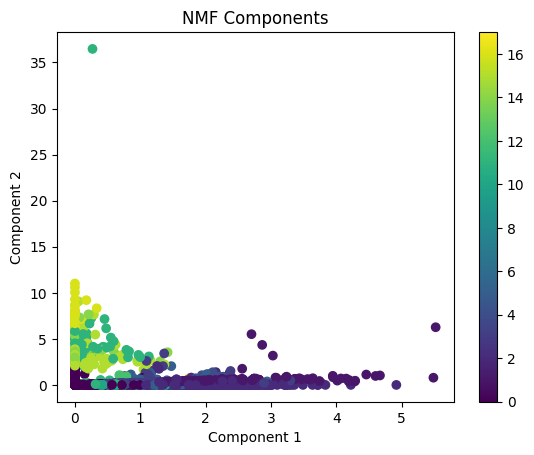

In [55]:
# Initialize NMF and fit to the data
model = NMF(n_components=2, init='random', random_state=0)
W = model.fit_transform(X)
H = model.components_

# Visualize the data
plt.scatter(W[:, 0], W[:, 1], c=y)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('NMF Components')
plt.colorbar()
plt.show()

## Graph Construction from NMF

## MLP

In [56]:
import torch
from torch import nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import random
import numpy as np

In [57]:
def set_seed(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)  # if you are using multi-GPU.
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

# Example usage
set_seed(42)

In [58]:
# Step 3: Use PyTorch MLP to classify the last column
# Preprocess the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [59]:
X_scaled = torch.FloatTensor(X_scaled)
y = torch.LongTensor(y)

In [60]:
# Assuming X and y are already defined as PyTorch tensors
# X = features tensor
# y = labels tensor

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create datasets and dataloaders
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

In [61]:
print(X_train.shape)
print(X_test.shape)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

torch.Size([3044, 45])
torch.Size([761, 45])


In [62]:

# Define a simple MLP model for multi-class classification
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(X_train.shape[1], 256),
            nn.ReLU(),
            nn.Linear(256, len(category_mapping))  # Adjusted for 29 classes
        )
        
    def forward(self, x):
        return self.layers(x)

# Initialize the model
model = MLP()

In [63]:
model

MLP(
  (layers): Sequential(
    (0): Linear(in_features=45, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=18, bias=True)
  )
)

In [64]:
# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()  # Suitable for multi-class classification
optimizer = torch.optim.Adam(model.parameters())

In [65]:
def train():
    # Training loop
    for epoch in range(1000):  # number of epochs can be adjusted
        for batch_idx, (data, target) in enumerate(train_loader):
            # Forward pass
            output = model(data)
            loss = criterion(output, target)

            # Backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        if epoch % 50 == 0:
            print(f"Epoch {epoch}, Loss: {loss.item()}")

train()

Epoch 0, Loss: 1.0315024852752686
Epoch 50, Loss: 0.01959654688835144
Epoch 100, Loss: 0.002020464511588216
Epoch 150, Loss: 0.00016121765656862408
Epoch 200, Loss: 0.0004081056686118245
Epoch 250, Loss: 0.006367022637277842
Epoch 300, Loss: 0.00016790907829999924
Epoch 350, Loss: 1.3448124263959471e-05
Epoch 400, Loss: 4.2748994019348174e-05
Epoch 450, Loss: 0.013310940936207771
Epoch 500, Loss: 1.775707096385304e-05
Epoch 550, Loss: 0.00013566175766754895
Epoch 600, Loss: 1.9274535588920116e-05
Epoch 650, Loss: 5.570978100877255e-05
Epoch 700, Loss: 7.38427900159877e-07
Epoch 750, Loss: 3.356957313371822e-05
Epoch 800, Loss: 1.7163560187327676e-05
Epoch 850, Loss: 3.731718607014045e-06
Epoch 900, Loss: 1.8930681108031422e-05
Epoch 950, Loss: 1.1971657841058914e-05


In [66]:
def test():
    model.eval()
    test_loss = 0
    all_targets = []
    all_predictions = []

    with torch.no_grad():
        for data, target in test_loader:
            output = model(data)
            test_loss += criterion(output, target).item()
            all_targets.extend(target.tolist())
            all_predictions.extend(output.argmax(dim=1).tolist())

    test_loss /= len(test_loader.dataset)
    print(f"Test Loss: {test_loss}")

    # Calculate F1 score
    f1 = f1_score(all_targets, all_predictions, average='weighted')
    print(f"F1 Score: {f1}")
    
    return all_predictions, all_targets
    
pred, target = test()

Test Loss: 0.026504027968478516
F1 Score: 0.9776618555762228


In [67]:
for i, j in zip(pred, target):
    print("Pred:",mapping_category[i],"\n","True:",mapping_category[j])
    print()

Pred: Agriculture Soil 
 True: Agriculture Soil

Pred: Hazardous Waste Incineration - Liquid Fuel Boiler 
 True: Hazardous Waste Incineration - Liquid Fuel Boiler

Pred: Hazardous Waste Incineration - Liquid Fuel Boiler 
 True: Hazardous Waste Incineration - Liquid Fuel Boiler

Pred: Agriculture Soil 
 True: Agriculture Soil

Pred: Hazardous Waste Incineration - Liquid Fuel Boiler 
 True: Hazardous Waste Incineration - Liquid Fuel Boiler

Pred: Cooking 
 True: Cooking

Pred: Hazardous Waste Incineration - Liquid Fuel Boiler 
 True: Hazardous Waste Incineration - Liquid Fuel Boiler

Pred: Paved Road Dust 
 True: Paved Road Dust

Pred: Hazardous Waste Incineration - Liquid Fuel Boiler 
 True: Hazardous Waste Incineration - Liquid Fuel Boiler

Pred: Hazardous Waste Incineration - Liquid Fuel Boiler 
 True: Hazardous Waste Incineration - Liquid Fuel Boiler

Pred: Motor Vehicle Exhaust 
 True: Motor Vehicle Exhaust

Pred: Motor Vehicle Exhaust 
 True: Motor Vehicle Exhaust

Pred: Agricultur